# Postprocessing Notebook for IDSM2

In [1]:
#interactive widget requires pip install ipympl  
%matplotlib widget
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np

In [2]:
df = pd.read_csv("./simulations/tb_idsm2_9.txt", sep='\s+')

In [3]:
df

,time,x1.vout1,x1.vout2,dout,x1.p1,x1.p2
0,1.000000e-12,0.8911,0.8479,0.01913,0.6900,0.810400
1,1.000000e-12,0.8912,0.8480,0.01913,0.6900,0.810400
2,1.001000e-12,0.8912,0.8481,0.01914,0.6900,0.810400
3,1.002000e-12,0.8914,0.8483,0.01914,0.6898,0.810200
4,1.005000e-12,0.8918,0.8487,0.01915,0.6893,0.809700
...,...,...,...,...,...,...
68372,2.200000e-06,0.7786,0.6779,1.20000,1.2000,0.000009
68373,2.200000e-06,0.7786,0.6779,1.20000,1.2000,0.000008
68374,2.200000e-06,0.7786,0.6778,1.20000,1.2000,0.000008
68375,2.200000e-06,0.7786,0.6778,1.20000,1.2000,0.000008


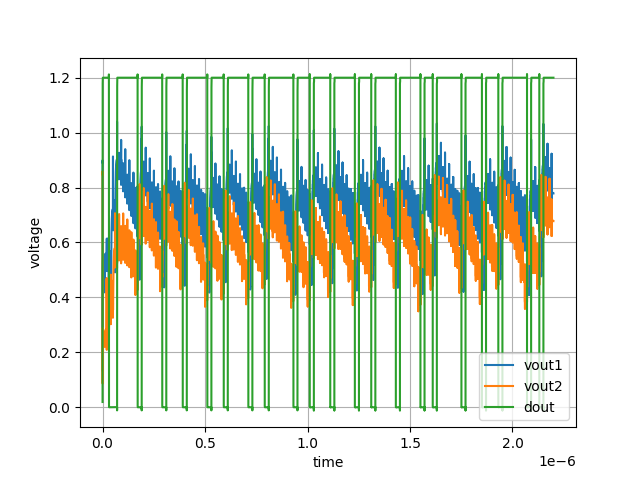

In [4]:
plt.figure(1)
plt.clf()
plt.plot(df['time'], df['x1.vout1'], label="vout1")
plt.plot(df['time'], df['x1.vout2'], label="vout2")
plt.plot(df['time'], df['dout'], label="dout")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [5]:
nfiles = 11
vin = np.arange(0.35, 0.86, 0.05)
vlo = 0.3
vhi = 0.9
vfs = vhi-vlo
per = 20e-9
tstart = 20e-9
N = 110
out = np.zeros([nfiles, N])
for i in range(nfiles): 
  file = "./simulations/tb_idsm2_" + str(i+1) + ".txt"
  df = pd.read_csv(file, sep='\s+')
  dout = df['dout']
  t = df['time']
  ts = np.arange(tstart, tstart+N*per, per)
  interp_func = interp1d(t, dout)
  dsamp = interp_func(ts)
  dsamp[dsamp > 0.6] = 1
  dsamp[dsamp < 0.6] = 0
  csum = np.cumsum(dsamp)
  out[i,:] = np.cumsum(csum)*2/N/(N+1)*vfs+vlo

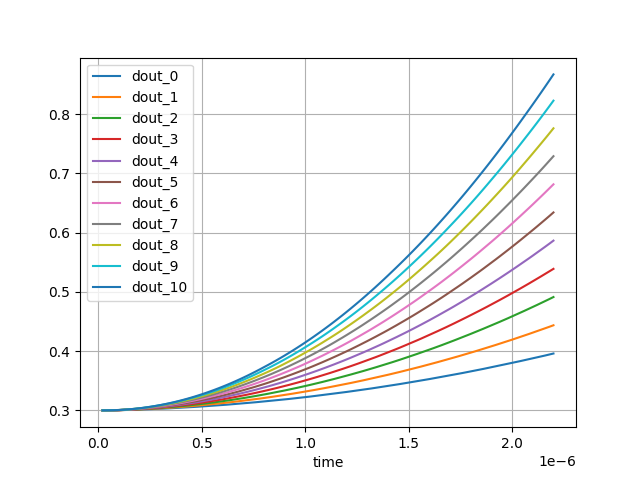

In [6]:
plt.figure(2)
plt.clf()
for i in range(nfiles):
  plt.plot(ts, out[i,:], label="dout_"+str(i))
plt.xlabel("time")
plt.legend(loc="upper left")
plt.grid()
plt.show()

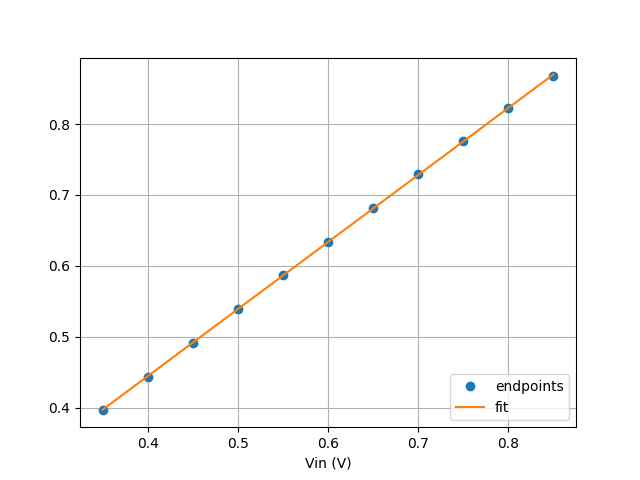

In [9]:
endpoints=(out[:,-1])
coef = np.polyfit(vin ,endpoints,1)
fit = np.poly1d(coef)
plt.figure(3)
plt.clf()
plt.plot(vin, endpoints, 'o', label="endpoints")
plt.plot(vin, fit(vin), label="fit")
plt.xlabel("Vin (V)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

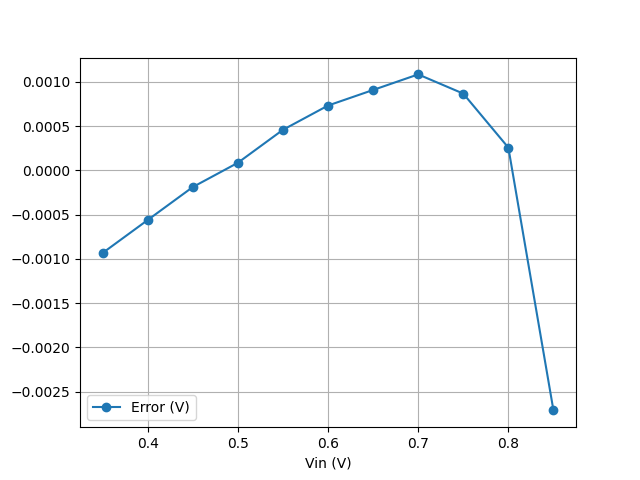

In [8]:
err = endpoints-fit(vin)
plt.figure(4)
plt.clf()
plt.plot(vin, err, 'o-', label="Error (V)")
plt.xlabel("Vin (V)")
plt.legend(loc="lower left")
plt.grid()
plt.show()